In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Cars.csv')

In [3]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [21]:
data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [24]:
data.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [26]:
data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [4]:
x = data[['HP','MPG','VOL','WT']]
y= data[['SP']]

In [5]:
x

,HP,MPG,VOL,WT
0,49,53.700681,89,28.762059
1,55,50.013401,92,30.466833
2,55,50.013401,92,30.193597
3,70,45.696322,92,30.632114
4,53,50.504232,92,29.889149
...,...,...,...,...
76,322,36.900000,50,16.132947
77,238,19.197888,115,37.923113
78,263,34.000000,50,15.769625
79,295,19.833733,119,39.423099


In [6]:
y

,SP
0,104.185353
1,105.461264
2,105.461264
3,113.461264
4,104.461264
...,...
76,169.598513
77,150.576579
78,151.598513
79,167.944460


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2) 

In [8]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(64, 4)
(17, 4)

(64, 1)
(17, 1)


In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [10]:
lm.fit(x_train,y_train)

LinearRegression()

In [11]:
print(lm.coef_)

[[ 0.26013166  0.19622779 -0.60718982  1.99289802]]


In [12]:
print(lm.intercept_)

[79.50344924]


<AxesSubplot:>

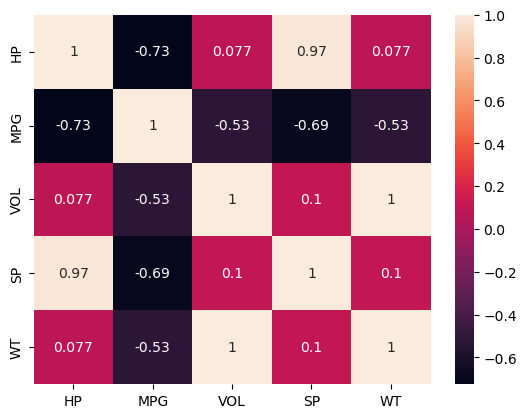

In [13]:
sns.heatmap(data.corr(),annot=True)

In [14]:
y_pred = lm.predict(x_test)

In [15]:
y_pred

array([[111.73343787],
       [117.56183717],
       [133.42919657],
       [107.13398063],
       [112.58224323],
       [113.67429407],
       [116.79690167],
       [111.76352043],
       [132.9309621 ],
       [114.80427899],
       [153.42462484],
       [113.07167023],
       [129.71896934],
       [115.28080593],
       [132.69824167],
       [127.00845915],
       [113.9985335 ]])

In [16]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual SP']= y_test
new_df['predicted SP']= y_pred
new_df

,HP,MPG,VOL,WT,actual SP,predicted SP
10,73,44.652834,89,29.363341,111.185353,111.733438
38,102,34.070668,86,28.630502,116.909442,117.561837
66,165,23.103172,114,37.979956,132.484609,133.429197
28,52,43.469434,104,34.483207,99.564907,107.133981
18,78,42.789909,91,29.929394,114.369293,112.582243
23,81,40.474723,96,31.837122,113.829145,113.674294
32,102,36.285456,97,31.380041,119.921115,116.796902
13,73,44.652834,89,29.378436,111.185353,111.763520
68,165,23.103172,123,40.472042,133.312342,132.930962
19,90,38.901834,103,33.516974,118.472936,114.804279


In [17]:
lm.score(x_train,y_train)*100

95.51574081911099

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9442681502914936
RMSE: 3.00991178337649
